In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hyperparameter_search(filename, architecture_name):
    # Load the training_metrics.csv file
    df_metrics = pd.read_csv(filename)

    # Set up the visualization style
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot

    df_acc = df_metrics.melt(id_vars=['epoch', 'trial_name'], value_vars=['accuracy', 'val_accuracy'],
                             var_name='Metric', value_name='Value')

    metric_mapping = {'accuracy': 'Train Accuracy', 'val_accuracy': 'Validation Accuracy'}
    df_acc['Metric'] = df_acc['Metric'].map(metric_mapping)

    sns.lineplot(data=df_acc, x='epoch', y='Value', hue='trial_name', style='Metric',
                 palette='tab10', marker='o', errorbar=None)

    plt.title(f'{architecture_name} Training and Validation Accuracy vs. Epochs', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(title='Run / Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)


    plt.subplot(1, 2, 2)

    df_loss = df_metrics.melt(id_vars=['epoch', 'trial_name'], value_vars=['loss', 'val_loss'],
                              var_name='Metric', value_name='Value')

    metric_mapping_loss = {'loss': 'Train Loss', 'val_loss': 'Validation Loss'}
    df_loss['Metric'] = df_loss['Metric'].map(metric_mapping_loss)

    sns.lineplot(data=df_loss, x='epoch', y='Value', hue='trial_name', style='Metric',
                 palette='tab10', marker='o', errorbar=None)

    plt.title(f'{architecture_name} Training and Validation Loss vs. Epochs', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.ylim(.4,.8)
    plt.legend(title='Run / Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

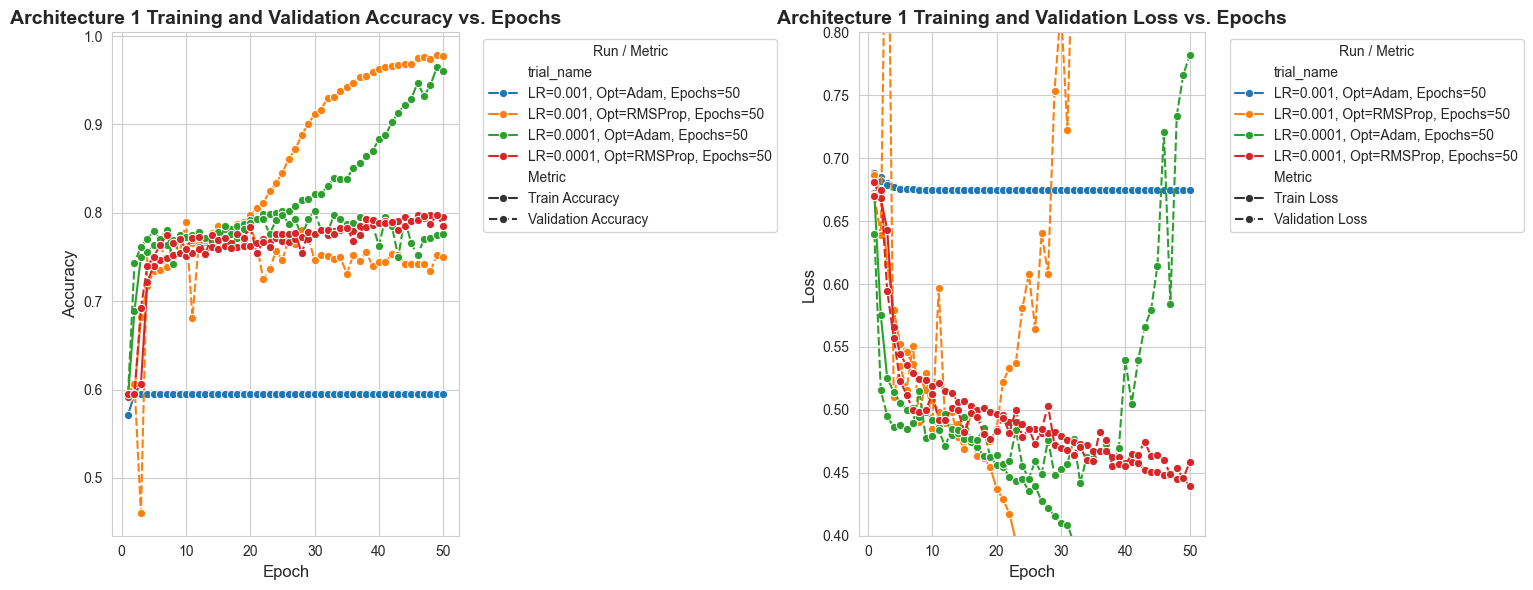

In [12]:
plot_hyperparameter_search('results/architecture1-50.csv', 'Architecture 1')


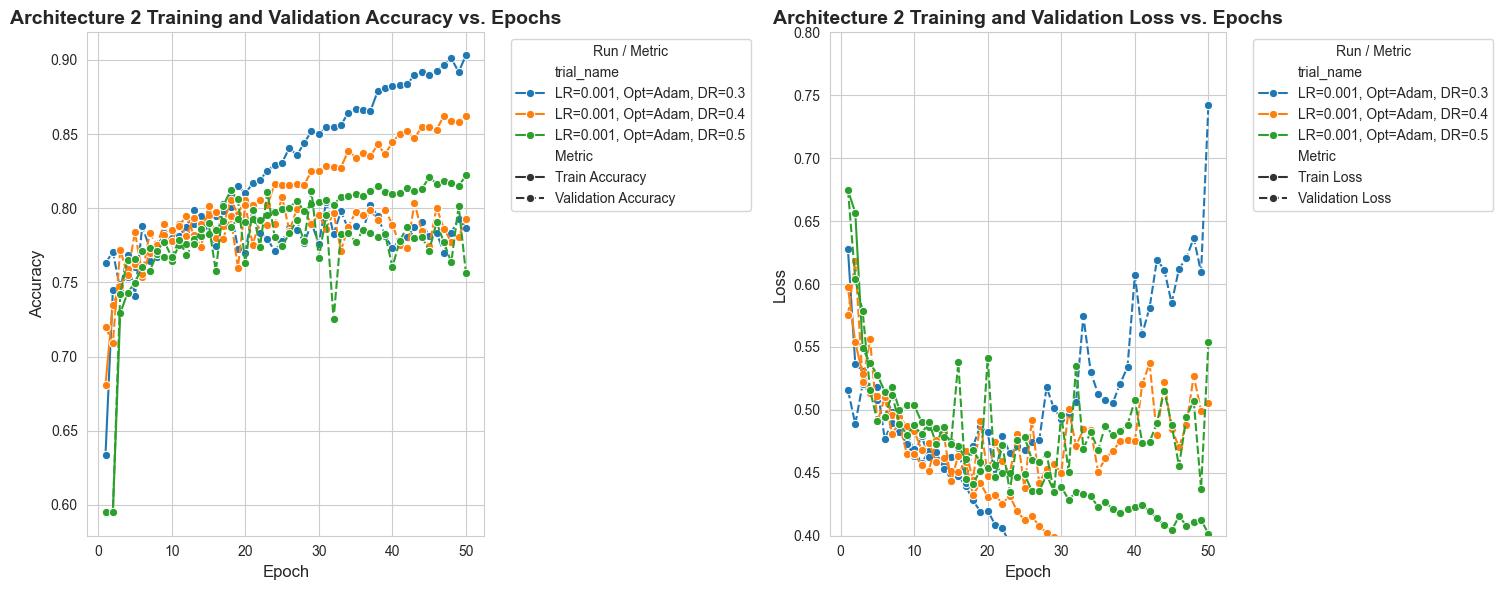

In [13]:
plot_hyperparameter_search('results/architecture2.csv', 'Architecture 2')